#### Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Описание данных:
•	airports_nearest — расстояние до ближайшего аэропортам44 в метрах (м)\
•	balcony — число балконов\
•	ceiling_height — высота потолков (м)\
•	cityCenters_nearest — расстояние до центра города (м)\
•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
•	first_day_exposition — дата публикации\
•	floor — этаж\
•	floors_total — всего этажей в доме\
•	is_apartment — апартаменты (булев тип)\
•	kitchen_area — площадь кухни в квадратных метрах (м²)\4а44
•	last_price — цена на момент снятия с публикации\
•	living_area — жилая площадь в квадратных метрах (м²)\
•	locality_name — название населённого пункта\
•	open_plan — свободная планировка (булев тип)\
•	parks_around3000 — число парков в радиусе 3 км\
•	parks_nearest — расстояние до ближайшего парка (м)\
•	ponds_around3000 — число водоёмов в радиусе 3 км\
•	ponds_nearest — расстояние до ближайшего водоёма (м)\
•	rooms — число комнат\
•	studio — квартира-студия (булев тип)\444усп
•	total_area — общая площадь квартиры в квадратных метрах (м²)\
•	total_images — число фотографий квартиры в объявлении


### Откройте файл с данными и изучите общую информацию

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#Импортирую данные и вывожу информацию о данных:

try:
    data = pd.read_csv('C:\\Users\\Ahsas\\Documents\\ЯНДЕКС_ПРАКТИКУМ\\pdf_работы\\data\\real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('./real_estate_data.csv',sep='\t')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [75]:
#вывожу первые пять строк:
pd.set_option('display.max_columns', None)
data.sort_values('last_price',ascending=True).head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


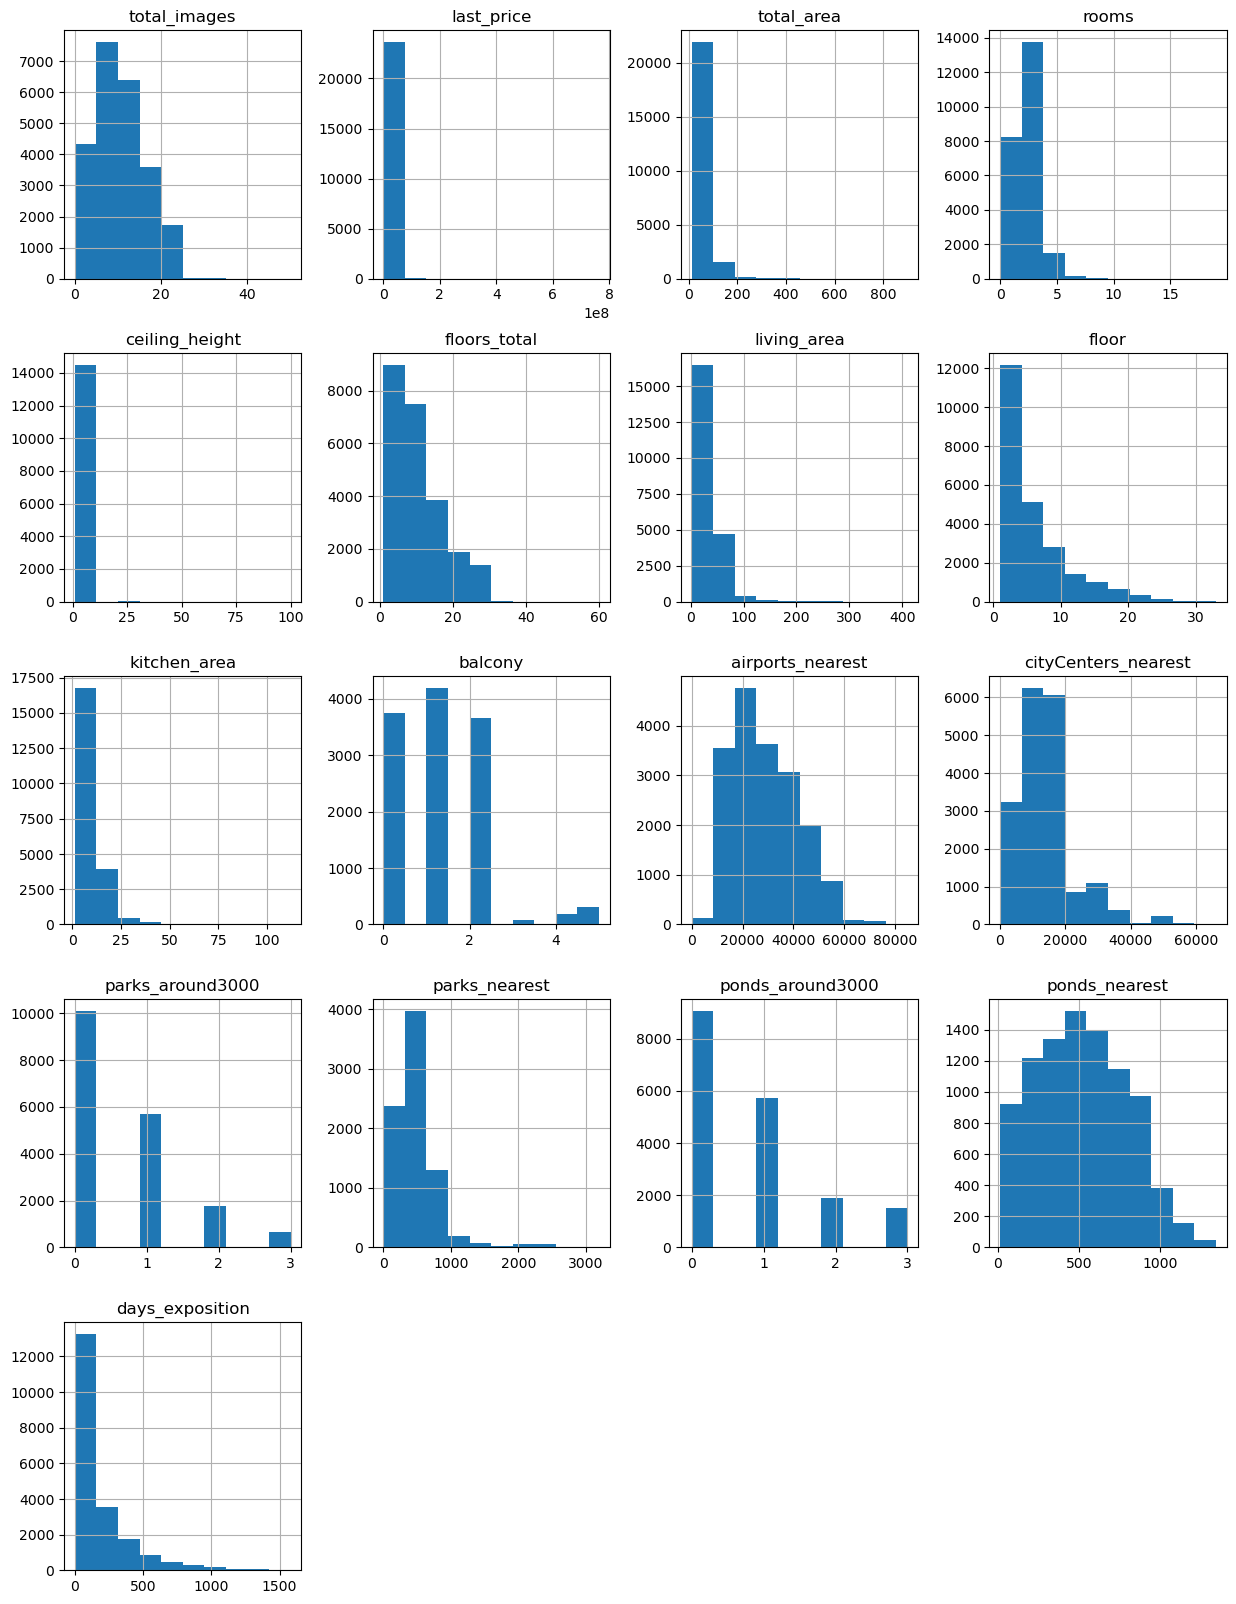

In [76]:
# строю гистаграммы для числовых параметров:
data.select_dtypes(exclude=[object,bool]).hist(figsize=(15, 20));


In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [78]:
print('Проверка числа записей с параметром День экспозиции <5:', data.query('days_exposition <5')['total_area'].count())

Проверка числа записей с параметром День экспозиции <5: 338


In [79]:
print('Проверка числа записей last_price = 0:', data.query('last_price == 0')['last_price'].count())

Проверка числа записей last_price = 0: 0


##### Выводы:
- Присутствуют 197 объектов, где не указано количество комнат. Возможно, это студии.
- В поле Высота потолков присутствуют недостоверные данныые 1, 1.26 и 100 метров. Удалить такие данные.
- В поле всего этажей в доме есть недостоверное значение 60 эт. удалить (справочно: в июле 2016 года 35-этажный Лахта Центр стал самым высоким зданием Санкт-Петербурга, его высота достигла 147 м)
- Минимальное значение - расстояние до аэропорта ( airports_nearest) не должно равняться нулю. Исправть, если возможно.
- Размер кухни 1.3 выглядит ошибочным. Удалить строку.
- Жилая площадь - мин. значение 2 м. Удалить строку, как недостоверную.
- Минимальное значение - days_exposition = 1 день, менее 5 дней - 338 строки. Это подозрительно, возможно недостоверные объеявления. Удалить такие строки. Максимальное значение -1580, также повлияет на среднюю. 

In [80]:
#Вывожу данные о пустых значениях:
print(data.isna().sum())
len(data)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


23699

#### Обработка пустых значений.
.
Пустые значения присутствуют в данных в следующих характеристиках:

-Колонка   -   число пустых   -    действие\
-ceiling_height 9195 оставить пустые, предполагая, что не указали/не знают\
-floors_total 86 удалить строки\
-living_area 1903 заменить на среднее, используя коэф. соотношения, посчитанный для данных где указана жилая.\
-is_apartment 20924 заменить на '0', предполагая, что большинство объектов - не апартаменты\
-kitchen_area 2278 заменить на среднее, используя коэф. соотношения, посчитанный для данных где указана пл. кухни\
-balcony 11519 оставить пустые, предполагая, что не указали/нет балкона\
-locality_name 49 удалить строки целиком, т.к. не указан населенный пункт(НП). Строк только 49, нет значительного влияния на результат анализа\
-airports_nearest 5542 заменить пустые значения медианными для соответствующего НП\
-cityCenters_nearest 5519 !оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико\
-parks_around3000 5518 ! оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико\
-parks_nearest 15620 ! оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико\
-ponds_around3000 5518 ! оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико\
-ponds_nearest 14589 ! оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико\
-days_exposition 3181 ! оставилю без измненений, т.к. нет основы для восстановления данных. а их число велико


In [81]:
# Пустые значения заменю на 0 для числовых параметров, предполагая, что данные не были заполнены пользователем, 
# либо объект, как например водоем, отсутствует:
data['is_apartment'] = data['is_apartment'].fillna('0') 
data['ceiling_height'] = data['ceiling_height'].fillna('0') 
#вывожу первые пять строк:
data.sort_values('last_price',ascending=True).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,0,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,0,2.0,16.0,1,0,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,0,3.0,NaN,3,0,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,0,5.0,NaN,1,0,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,0,5.0,17.3,4,0,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0


In [82]:
# Преобразую тип для ряда колонок:
data['airports_nearest']= data['airports_nearest'].astype(float)
data['ceiling_height']= data['ceiling_height'].astype(float)
data['living_area']= data['living_area'].astype(float)
data['kitchen_area']= data['kitchen_area'].astype(float)
data['rooms']= data['rooms'].astype(int)
data['floor']= data['floor'].astype(int)
data['is_apartment']= data['is_apartment'].astype(bool)
data['living_area']= data['living_area'].astype(float)
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int32
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int32
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [83]:
# Чтобы заполнить пропуски в данных о площади кухни, применю коэф. 
# к общей площади помещения, рассчитанный как средний на основе данных, где площадь кухни указана:

kitchen_area=data.query('kitchen_area!=0')
av_kitchen_ratio=kitchen_area['kitchen_area'].mean()/kitchen_area['total_area'].mean()

data.loc[data['kitchen_area']==0, 'kitchen_area']=data['total_area']*av_kitchen_ratio
print('Средний коэф. площади кухни:', av_kitchen_ratio )
print('Проверка:', 
      data['kitchen_area'].head())\

len(data)


Средний коэф. площади кухни: 0.17514570787846798
Проверка: 0    25.0
1    11.0
2     8.3
3     NaN
4    41.0
Name: kitchen_area, dtype: float64


23699

In [160]:
# Чтобы заполнить пропуски в данных о жилой площади применю коэф. 
# к общей площади помещения, рассчитанный как средний на основе данных, где жилая площадь указана:

living_area=data.query('living_area!=0')
av_living_ratio=living_area['living_area'].mean()/living_area['total_area'].mean()

data.loc[data['living_area']==0, 'living_area']=data['total_area']*av_living_ratio
print('Средний коэф. жилой площади:', av_kitchen_ratio )
print('Проверка\n', data['living_area'].value_counts().head())

Средний коэф. жилой площади: 0.17502230882201655
Проверка
 living_area
18.0    823
17.0    638
30.0    581
16.0    451
20.0    446
Name: count, dtype: int64


In [85]:
# удалю строки с экстремальными и  недостоверными значениями в поле Высота потолка, но оставляю значения 0:
def caterorize(row):
    ceiling_height = row['ceiling_height']

    if 8>=ceiling_height>=2:
        return 'Норм'
    elif ceiling_height==0:
        return 'Норм'
    else:
        return 'Не_норм'
    
data['ceiling_norm']=data.apply(caterorize,axis=1)
data.pivot_table(index='ceiling_norm', values='locality_name',aggfunc=('count'))

,locality_name
ceiling_norm,
Не_норм,29
Норм,23621


In [86]:
data=data[data['ceiling_norm']=='Норм']

print(len(data))
data.describe().T

23670


,count,mean,std,min,25%,50%,75%,max
total_images,23670.0,9.858344e+00,5.680518e+00,0.0,6.0,9.0,14.0,50.0
last_price,23670.0,6.543640e+06,1.089310e+07,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23670.0,6.035864e+01,3.566876e+01,12.0,40.0,52.0,69.9,900.0
rooms,23670.0,2.070934e+00,1.078637e+00,0.0,1.0,2.0,3.0,19.0
ceiling_height,23670.0,1.668195e+00,1.348652e+00,0.0,0.0,2.5,2.7,8.0
floors_total,23584.0,1.067389e+01,6.593139e+00,1.0,5.0,9.0,16.0,60.0
living_area,21767.0,3.446209e+01,2.203934e+01,2.0,18.6,30.0,42.3,409.7
floor,23670.0,5.892269e+00,4.884778e+00,1.0,2.0,4.0,8.0,33.0
kitchen_area,21397.0,1.057154e+01,5.907872e+00,1.3,7.0,9.1,12.0,112.0
balcony,12161.0,1.148343e+00,1.069862e+00,0.0,0.0,1.0,2.0,5.0


In [87]:
# удалю строку с экстремальным числом этажей:
data = data.query('floors_total < 30 or floors_total.isna()', engine='python')
data['floors_total'].max()


29.0

In [88]:
# удалю строки с экстремальным last_pricee:
data = data.query('last_price > 50000', engine='python')
len(data)


23639

In [89]:
# Удалю строки, где отсутствует Наименование населенного пункта, т.к. число таких строк незначительное(49):
data=data.dropna(subset=['locality_name'])
#Проверка:
print('Осталось строк с пустым названием населенного пункта: -',data['locality_name'].isna().sum())  

Осталось строк с пустым названием населенного пункта: - 0


In [90]:
#Заполню пропуски в данных для поля airports_nearest:     

for locality in data['locality_name'].unique():
    median_value = data.loc[data['locality_name'] == locality, 'airports_nearest'].median()
    data.loc[(data['airports_nearest']==0) & (data['locality_name'] == locality), 'airports_nearest'].median()
data.loc[data['airports_nearest']==0, 'airports_nearest'] = data['airports_nearest'].median()

#Проверка:
empty_air=data.query('airports_nearest==0')['airports_nearest'].count()
print('Осталось строк с пустым полем "расстояние до ближайшего аэропорта в метрах" -', empty_air)

Осталось строк с пустым полем "расстояние до ближайшего аэропорта в метрах" - 0


In [91]:
# Чтобы заполнить пропуски в данных о площади кухни, применю коэф. 
# к общей площади помещения, рассчитанный на основе данных, где площадь кухни указана:
kitchen_area=data.query('kitchen_area!=0')
av_kitchen_ratio=kitchen_area['kitchen_area'].mean()/kitchen_area['total_area'].mean()
print('Средний коэф. площади кухни:', av_kitchen_ratio )

Средний коэф. площади кухни: 0.17502230882201655


In [92]:
#Контраль наличия пустых ячеек после обработки:
print('Всего записей осталось после обработки:', len(data))
data.isna().sum()
print('Осталось записей без даный об удаленности от центра:',data['cityCenters_nearest'].isna().sum()) 
#Осталось 5 501 записей без даный об удаленности от центра.

Всего записей осталось после обработки: 23590
Осталось записей без даный об удаленности от центра: 5501


In [93]:
# удалю абсолютные дубли:
data=data.drop_duplicates().reset_index(drop=True)

In [94]:
#код ревьюера
#data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#(data2['total_area']).hist(bins=30);

####  Корректировка типа и наименований в данных:

In [95]:
#Вывожу и корректирую названия населенных пунктов:

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [96]:
# Заменяю букву Ё:

data['locality_name']= data['locality_name'].str.replace('ё', 'е', regex=True)

In [97]:
# Удалю неявные дубли одних и тех же НП:

data = data.replace({'locality_name':{'Никольское': 'село Никольское', 
                                      'пос. станции Вещево': 'пос. при ЖДС Вещево', 
                                      'городской поселок Павлово':'ПГТ Павлово', 
                                      'село Никольское':'Никольское',
                                      'городской поселок Мга': 'ПГТ Мга',
                                      'Любань': 'пос. Любань',
                                      'Мурино': 'пос. Мурино',
                                      'городской поселок Лесогорский': 'ПГТ Лесогорский',
                                      'Большая Ижора' : 'пос. Большая Ижора',
                                      'городской поселок Назия': 'ПГТ Назия',
                                      'ГП Рощино': 'ПГТ Рощино',
                                      'городской поселок Советский': 'ПГТ Советский'}}
                   )


In [98]:
# Применю сокращения к названиям НП:

data['locality_name']= data['locality_name'].str.replace('городской посёлок', 'ГП', regex=True)
data['locality_name']= data['locality_name'].str.replace('деревня ', 'д.', regex=True)
data['locality_name']= data['locality_name'].str.replace('городской поселок', 'ГП', regex=True)
data['locality_name']= data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'СНТ', regex=True)
data['locality_name']= data['locality_name'].str.replace('пос. городского типа', 'ПГТ', regex=True)
data['locality_name']= data['locality_name'].str.replace('садовое товарищество', 'СТ', regex=True)
data['locality_name']= data['locality_name'].str.replace('коттеджный пос.', 'КП', regex=True) 
data['locality_name']= data['locality_name'].str.replace('пос. при железнодорожной станции', 'пос. при ЖДС', regex=True) 
data['locality_name']= data['locality_name'].str.replace('пос. станции', 'пос. при ЖДС', regex=True)
data['locality_name']= data['locality_name'].str.replace('поселок', 'пос.', regex=True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'ГП Большая Ижора', 'ГП Будогощь', 'ГП Виллози',
       'ГП Новоселье', 'ГП Рощино', 'ГП Свирьстрой', 'ГП Федоровское',
       'ГП Янино-1', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'КПлок Кивеннапа Север', 'КПлок Лесное', 'КПлок Счастье',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Никольское', 'Новая Ладога',
       'Отрадное', 'ПГТ Лесогорский', 'ПГТ Мга', 'ПГТ Назия',
       'ПГТ Павлово', 'ПГТ Советский', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'СНТ Лесная Поляна', 'СТ Новая Ропша', 'СТ Приладожский',
       'СТ Рахья', 'СТ Садко', 'Санкт-Петербург', 'Светогорск',
       'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой',
       'Тихвин', 'Тосно', 'Шлиссельбург', 'д.Агалатово', 'д.Аро',
      

In [99]:
# Трансформирую first_day_exposition из типа object в дата,время. 
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

#Найдет города, входящие в первую десятку по числу объевлений:
rating_cities=data.pivot_table(index='locality_name', values='first_day_exposition', 
                 aggfunc=('count')).sort_values('first_day_exposition',ascending=False)
top_10_cities=rating_cities.head(10)

print(top_10_cities)



                 first_day_exposition
locality_name                        
Санкт-Петербург                 15673
пос. Мурино                       588
пос. Шушары                       440
Всеволожск                        398
Пушкин                            369
Колпино                           338
пос. Парголово                    327
Гатчина                           306
д.Кудрово                         299
Выборг                            237


####  Выявление аномалий в данных:

Выявлены аномалии в данных:
- В поле Высота потолков присутствуют недостоверные данные 1, 1.26 и 100 метров. Удаляю выбросы
- В поле всего этажей в доме есть недостоверное значение 60 эт. удаляю. (В июле 2016 года 35-этажный Лахта Центр стал самым высоким зданием Санкт-Петербурга, его высота достигла 147 м)
- Минимальное значение - расстояние до аэропорта ( airports_nearest) не должно равняться нулю. Исправть, если возможно.
- Размер кухни 1.3 выглядит ошибочным. удалены записи со значением менее 2м.
- Жилая площадь - мин. значение 2 м. Удаляю строку, как недостоверную.
- Минимальное значение - days_exposition = 1 день. Это подозрительно, возможно недостоверные объеявления. Удалить такие строки. Максимальное -1580, также повлияет на среднюю.

- минимальное значение 12190 last_price неправдоподобно. Удалю эту строку. просмотреть прочие объекты с мин. ценами.
- минимальное значение total_area =12 м неправдоподобно. Возможно комната.
- минимальное значение rooms=0 неправдоподобно. возможно речь о студии. Проверить.
- минимальное значение price_per_m =111.83	неправдоподобно. 

 

In [100]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
total_images,23590.0,9.858881,0.0,6.0,9.0,14.0,50.0,5.680423
last_price,23590.0,6543362.024968,430000.0,3400000.0,4650000.0,6790000.0,763000000.0,10909309.12315
total_area,23590.0,60.337223,12.0,40.0,52.0,69.7,900.0,35.691124
first_day_exposition,23590,2017-11-09 17:20:54.124628992,2014-11-27 00:00:00,2017-05-15 00:00:00,2017-12-12 00:00:00,2018-08-26 00:00:00,2019-05-03 00:00:00,NaN
rooms,23590.0,2.070793,0.0,1.0,2.0,3.0,19.0,1.079128
ceiling_height,23590.0,1.67058,0.0,0.0,2.5,2.7,8.0,1.347977
floors_total,23505.0,10.642544,1.0,5.0,9.0,16.0,29.0,6.52737
living_area,21693.0,34.45867,2.0,18.6,30.0,42.3,409.7,22.057132
floor,23590.0,5.877024,1.0,2.0,4.0,8.0,27.0,4.853268
kitchen_area,21329.0,10.56036,1.3,7.0,9.1,12.0,112.0,5.899022


In [101]:
#Размер кухни 1.3 выглядит ошибочным. Удаляю строку. 
#Значения 112 и близкие - также подозрительно большие, но возможно относятся к кухням-гостиным в частных домах. Проверить.
data = data.query('kitchen_area >2', engine='python')
print(data.pivot_table(index='kitchen_area', values= 'locality_name', aggfunc=('count')))
len(data)

              locality_name
kitchen_area               
2.30                      1
2.40                      1
2.89                      1
3.00                      7
3.20                      1
...                     ...
93.20                     1
100.00                    1
100.70                    1
107.00                    1
112.00                    1

[964 rows x 1 columns]


21321

In [102]:
print('Предположение выше о большой кухне в больших объектах подтверждается:')
print(data.loc[data['kitchen_area']>=30].pivot_table(index='kitchen_area',values='total_area', aggfunc='mean'))

Предположение выше о большой кухне в больших объектах подтверждается:
              total_area
kitchen_area            
30.00         124.931667
30.20         125.633333
30.50          56.600000
30.59         104.660000
30.60         142.100000
...                  ...
93.20         181.100000
100.00        590.000000
100.70        255.000000
107.00        249.700000
112.00        900.000000

[137 rows x 1 columns]


In [103]:
#Проверю, к каким помещениям относятся метражи < 20 м. кв.:
data_total_area=data.query('total_area<20')
data_total_area.pivot_table(index='is_apartment', values= 'total_area', aggfunc=('count', 'mean'))
# В большинстве случаев - это апартаменты, другие, возможно, нежилые помещения типа машиноместа.

,count,mean
is_apartment,,
False,1,17.0
True,2,18.2


### В таблицу добавлены новые столбцы:

•	price_per_m - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)\
•	week_day - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)\
•	month - месяц публикации объявления\
•	year- год публикации объявления\
•	cityCenters_km - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)\
•	floor_type -тип этажа квартиры (значения — «‎первый», «последний», «другой»)\.


In [104]:
#Добавляю новые столбцы - цена за 1 кв.м., день, месяц, год из параметра Первый день экспозиции:

#1:цена одного квадратного метра:
data['price_per_m']=(data['last_price']/data['total_area']).round(2)
data['week_day']=data['first_day_exposition'].dt.weekday
data['month']=data['first_day_exposition'].dt.month
data['year']=(data['first_day_exposition']).dt.year

#5: расстояние до центра города в километрах
data['cityCenters_km']=(data['cityCenters_nearest']/1000).round()
data['cityCenters_km']=data['cityCenters_km'].fillna('0') 
data['cityCenters_km']=data['cityCenters_km'].astype(int)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_norm,price_per_m,week_day,month,year,cityCenters_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Норм,120370.37,3,3,2019,16
1,7,3350000.0,40.4,2018-12-04,1,0.00,11.0,18.6,1,True,False,False,11.0,2.0,пос. Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Норм,82920.79,1,12,2018,19
2,10,5196000.0,56.0,2015-08-20,2,0.00,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Норм,92785.71,3,8,2015,14
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Норм,100000.00,1,6,2018,8
5,10,2890000.0,30.4,2018-09-10,1,0.00,12.0,14.4,5,True,False,False,9.1,NaN,ГП Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Норм,95065.79,0,9,2018,0


In [105]:
# Категоризирую этаж для каждого объекта:

def caterorize(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == floors_total:
        return 'Последний'
    elif floor==1:
        return 'Первый'
    else:
        return'Другой'

data['floor_type']=data.apply(caterorize,axis=1)
data.groupby('floor_type')['floor_type'].count()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_norm,price_per_m,week_day,month,year,cityCenters_km,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Норм,120370.37,3,3,2019,16,Другой
1,7,3350000.0,40.4,2018-12-04,1,0.00,11.0,18.6,1,True,False,False,11.0,2.0,пос. Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Норм,82920.79,1,12,2018,19,Первый
2,10,5196000.0,56.0,2015-08-20,2,0.00,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Норм,92785.71,3,8,2015,14,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Норм,100000.00,1,6,2018,8,Другой
5,10,2890000.0,30.4,2018-09-10,1,0.00,12.0,14.4,5,True,False,False,9.1,NaN,ГП Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Норм,95065.79,0,9,2018,0,Другой


### Исследовательский анализ данных

Анализ ключевых параметров:\
    1.  Число объектов в городах\
    2.  Общая площадь\
    3.  Жилая площадь\
    4.  Площадь кухни
    5.  Цена объекта\
    6.  Количество комнат\
    7.  Высота потолков\
    8.  Тип этажа квартиры («первый», «последний», «другой»\
    9.  Общее количество этажей в доме\
    10.  Расстояние до центра города в метрах\
    11.  расстояние до ближайшего парка\

In [106]:
#выделю данные Санкт-Петербурга в переменную:
spb_data=data.loc[data['locality_name']=='Санкт-Петербург']
print(spb_data['locality_name'].count())

14292


##### 1. Число объектов в городах

In [107]:
#Выделяю ТОП-10 городов по числу объектов:
data['group_cities']=data['locality_name'].where(data['locality_name'].isin(top_10_cities.index), 'Другие')
data_top_city= data.pivot_table(index='group_cities', values='locality_name', aggfunc='count')

                   number_of_items  median_price
locality_name                                   
Петергоф                       190     3725000.0
Сестрорецк                     168     5450000.0
Красное Село                   167     3390000.0
Кудрово                        158     4150000.0
д.Новое Девяткино              133     3500000.0

Характеристика выборки объектов в прочих городах (не ТОП-10):


,count,mean,std,min,25%,50%,75%,max
number_of_items,299.0,1.377926e+01,2.877274e+01,1.0,1.0,4.0,10.0,190.0
median_price,299.0,2.196593e+06,1.653019e+06,450000.0,1437500.0,1950000.0,2637500.0,20295200.0


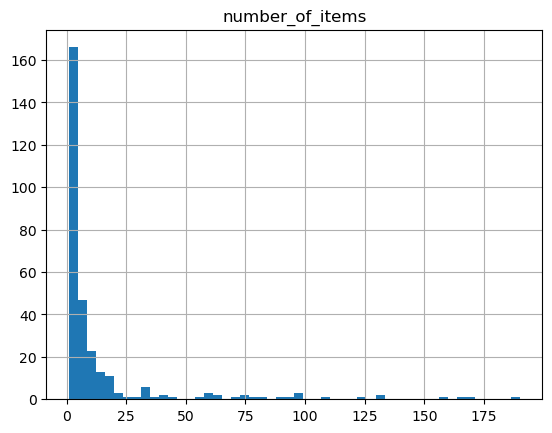

In [108]:
# Прочие города:
data_other_cities=data.loc[data['group_cities'] =='Другие']
other_cities=data_other_cities.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'median'])
other_cities.columns=['number_of_items','median_price']
other_cities.hist(column='number_of_items', bins=50)
print(other_cities.sort_values('number_of_items', ascending=False).head())
print()
print('Характеристика выборки объектов в прочих городах (не ТОП-10):')
other_cities.describe().T

###### Вывод:
кроме ТОП-10 городов, в выборке присутствует 317 прочих населенных пунктов, со средним числом ОН =4, максимально 201, и средней стоимостью лота около 2 млн.

,locality_name
group_cities,
Санкт-Петербург,14292
Другие,4120
пос. Мурино,479
пос. Шушары,398
Всеволожск,357
Пушкин,338
Колпино,322
Гатчина,294
пос. Парголово,289


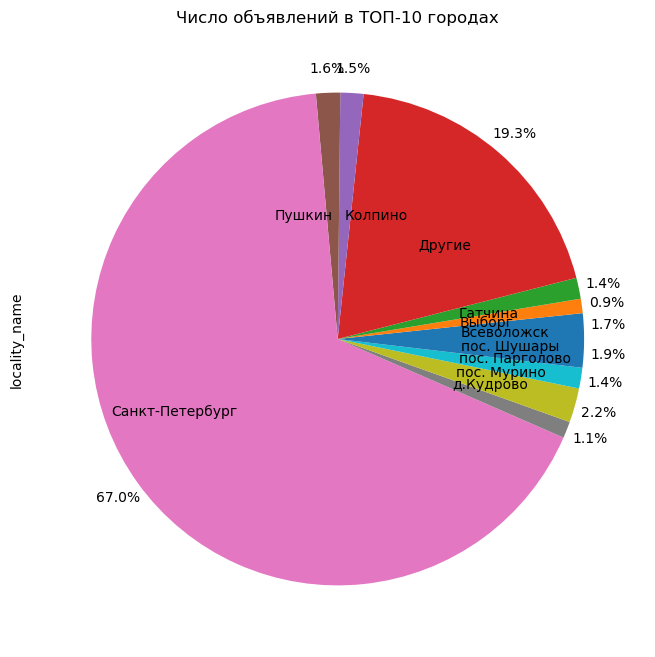

In [109]:
# Диаграмма для ТоП-10 и прочих городов:
data_top_city.sort_values(by='group_cities',ascending =True).plot(title='Число объявлений в ТОП-10 городах',y='locality_name', 
                                    kind= 'pie',pctdistance=1.1, figsize=(8,8),autopct='%1.1f%%',labeldistance=.5, legend=False)


data_top_city.sort_values(by='locality_name',ascending =False)

###### Вывод:
•	Подавляющее большинство объектов, выставленных на продажу за наблюдаемый отрезок времени, с нояб. 2014 г. по май 2019 г.,расположено в Санкт-Петербурге - 14292 объектов (67% от общего числа).
•	Всего в выборке представлены 309 населенных пункта региона, где по числу выставленных на продажу объектов, кроме лидера - Санкт-Петербурга, доминируют пос. Мурино и пос. Шушары, 479 и 398 объектов соответственно.

##### 2. Общая площадь

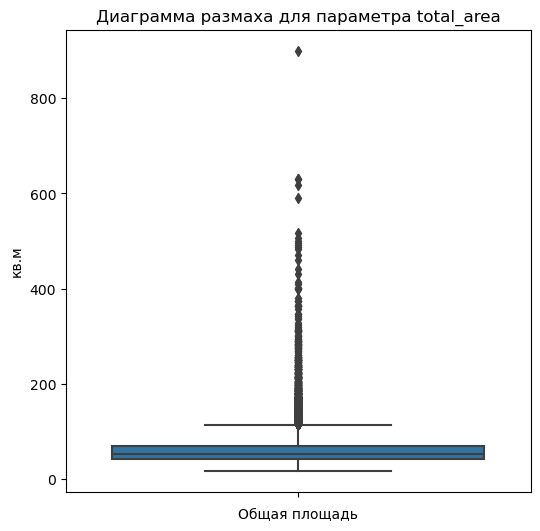

count    21321.000000
mean        60.745467
std         35.063463
min         17.000000
25%         40.600000
50%         52.400000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [110]:
plt.figure(figsize=(6,6))
sns.boxplot(y='total_area', data=data.reset_index())
plt.ylabel('кв.м')
plt.title('Диаграмма размаха для параметра total_area')
plt.xlabel('Общая площадь')
plt.show()
data['total_area'].describe().T


Характеристика выборки: Общая площадь

                 number_of_items  median_total_area
locality_name                                      
Санкт-Петербург            14292              55.20
пос. Мурино                  479              39.00
пос. Шушары                  398              50.35
Всеволожск                   357              53.50
Пушкин                       338              54.20


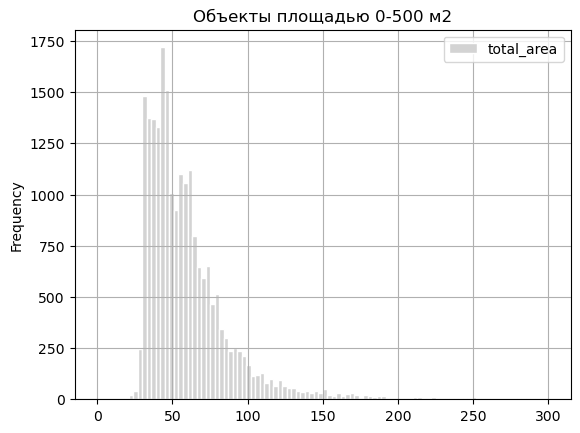

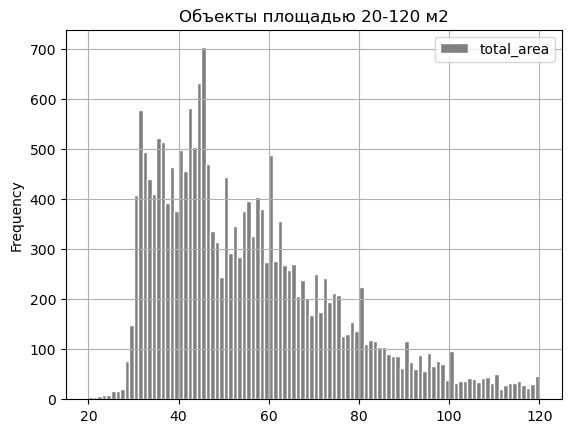

In [111]:
total_area=data.pivot_table(index='locality_name', values='total_area', aggfunc=['count', 'median'])
total_area.columns=['number_of_items','median_total_area']
data.plot(y='total_area', kind='hist', grid=True, color='lightgrey', ec='white',range=(0,300), bins=100, legend=True, title='Объекты площадью 0-500 м2')
data.plot(y='total_area',kind='hist', grid=True, color='grey', ec='white',range=(20,120), bins=100, legend=True, title='Объекты площадью 20-120 м2')
print()
print('Характеристика выборки: Общая площадь')
total_area.describe().T
print()
print(total_area.sort_values('number_of_items', ascending=False).head())

###### Вывод:
    - Подавляющее большинство объектов имеют площадь от 40 до 69 м2. Самый распространенный метраж - 42-43 м2.
    - Выбросами на диаграмме размаха выглядят значения до 20 и более ~120 м2. 
    - Медианным значением площади является 48 м2 всех городов выборки.
    Объекты с площадью до 20 метров, предпложительно, являются нежилыми - гаражи, кладовки. Их целесообразно удалить при анализе цен.


##### 3. Жилая площадь

In [112]:
#Проверка на наличие 0 значений:
print(data.loc[data['living_area']==0] ['living_area'].count())

0


                 number_of_items  median_total_area
locality_name                                      
Санкт-Петербург            14021              31.50
пос. Мурино                  458              17.68
пос. Шушары                  393              28.42
Всеволожск                   357              30.00
Пушкин                       337              30.00


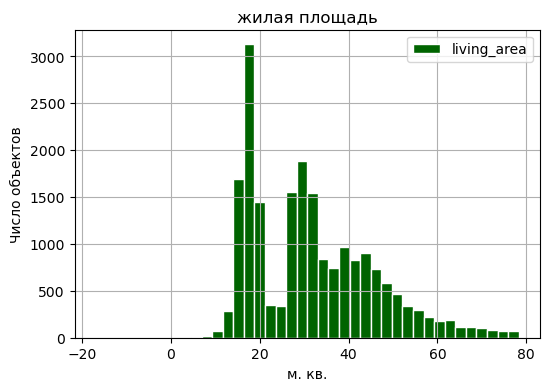


Характеристика выборки: Жилая площадь


count    20883.000000
mean        34.649632
std         21.943018
min          2.000000
25%         18.800000
50%         30.100000
75%         42.600000
max        409.700000
Name: living_area, dtype: float64

In [113]:
# для анализа исключены данные с нулевыми значениями параметра:
living_area=data.query('living_area!=0').pivot_table(index='locality_name', values='living_area', aggfunc=['count', 'median'])
living_area.columns=['number_of_items','median_total_area']

print(living_area.sort_values('number_of_items', ascending=False).head())

q1 = data['living_area'].quantile(.25)
q3 = data['living_area'].quantile(.75)
iqr = q3 - q1 

data['living_area'].hist(bins=40, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6, 4), color='darkgreen', ec='white', legend=True)
plt.title('жилая площадь')
plt.xlabel('м. кв.')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: Жилая площадь')
data['living_area'].describe().T


###### Вывод:
Наиболее частое значение жилой площади на уровне 18-19 м2. Значения менее 20 м2 наблюдаются, 
но, вероятно, являются достоверными для объектов самых маленьких метражей. Хвост диаграммы по мере роста 
показателя доходит до значений около 150 для жилой площади. 
Такие значения, возможно, представляют объекты типа индивидуальных домов.
Медианное значение жилой площади для Санкт-Петербурга - 31 м2.

##### 4. Площадь кухни

In [114]:
#Проверка на наличие 0 значений:
print(data.loc[data['kitchen_area']==0] ['kitchen_area'].count())

0


                 number_of_items  median_total_area
locality_name                                      
Санкт-Петербург            14292               9.90
пос. Мурино                  479              10.40
пос. Шушары                  398              10.80
Всеволожск                   357              10.00
Пушкин                       338               8.85


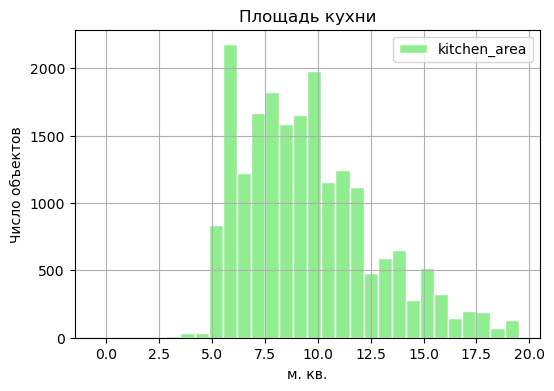


Характеристика выборки:


count    21321.000000
mean        10.563605
std          5.897747
min          2.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [115]:
kitchen_area=data.query('kitchen_area!=0').pivot_table(index='locality_name', values='kitchen_area', aggfunc=['count', 'median'])
kitchen_area.columns=['number_of_items','median_total_area']

print(kitchen_area.sort_values('number_of_items', ascending=False).head())

q1 = data['kitchen_area'].quantile(.25)
q3 = data['kitchen_area'].quantile(.75)
iqr = q3 - q1 

data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='lightgreen', ec='white', legend=True)
plt.title('Площадь кухни')
plt.xlabel('м. кв.')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки:')
data['kitchen_area'].describe().T

###### Вывод:
Наиболее распространенный метраж находится в интервале от 5 до 10 м2. 
Наибольшее число объектов выборки имеют кухню - 5,7 м2.
Значения менее 5 м2 присутствуют, но, возможно, являются достоверными для студий или апартаментов.
Медианное значение жилой площади для Санкт-Петербурга около 10 м2. 
Максимальное значение площади кухни - 112 м. Выше проверено, что подобные метражи кухни указаны для крупных по площади объектов, предположительно частных домов и, возможно, эксклюзивных квартир.

##### 5. Цена объекта

In [116]:
#Проверка на наличие 0 значений:
print(data.loc[data['last_price']==0] ['last_price'].count())

0


                 number_of_items  median_price
locality_name                                 
Санкт-Петербург            14292     5550000.0
пос. Мурино                  479     3580000.0
пос. Шушары                  398     3970000.0
Всеволожск                   357     3450000.0
Пушкин                       338     5200000.0


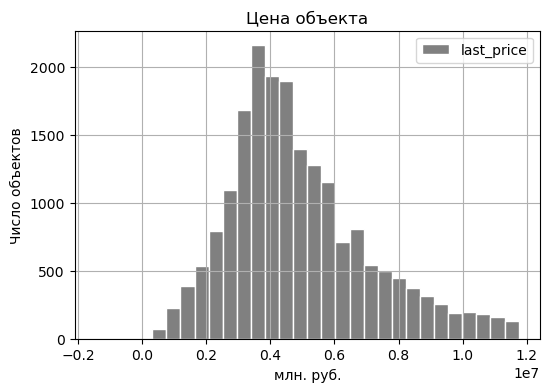


Характеристика выборки:


count    2.132100e+04
mean     6.546062e+06
std      9.745941e+06
min      4.300000e+05
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [117]:
price=data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'median'])
price.columns=['number_of_items','median_price']
print(price.sort_values('number_of_items', ascending=False).head())

q1 = data['last_price'].quantile(.25)
q3 = data['last_price'].quantile(.75)
iqr = q3 - q1 

#data['last_price']=data['last_price']/1000000
data['last_price'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='grey', ec='white', legend=True)
plt.title('Цена объекта')
plt.xlabel('млн. руб.')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки:')

data['last_price'].describe().T

###### Вывод:
Исключаю выбросы, т.о. максимальная цена объектов - 12 млн. руб. 
Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб. Наибольшее число объектов имеют цену около 3.5-4 млн.руб. Среднее значение - 6,5 млн, медиана 4.6 млн. 

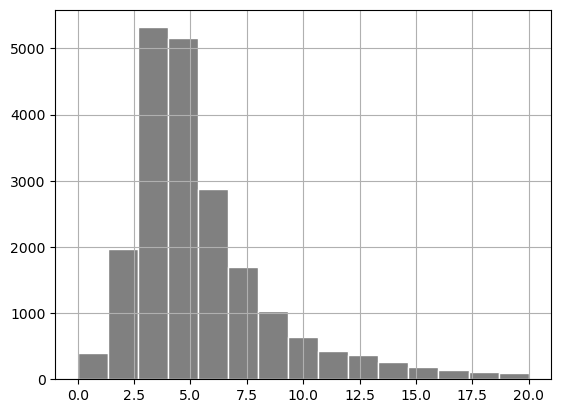

In [161]:
#код ревьюера
(data['last_price']/1000000).hist(range=(0, 20), color='grey', ec='white',bins=15);

##### 6. Количество комнат

In [119]:
#Проверка на наличие 0 значений:
print(data.loc[data['rooms']==0] ['rooms'].count())

0


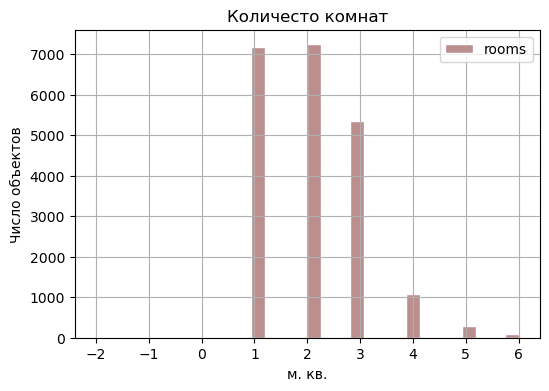

Характеристика объектов С-Петербурга по числу комнат:
          av_area  No_items
rooms                      
1       38.390769      4419
2       57.387797      4725
3       80.188068      3835
4      110.142902       889
5      166.802695       256
6      203.468681        91
7      258.811765        51
8      246.500000         8
9      316.114286         7
10     259.566667         3
11     188.900000         2
12     900.000000         1
14     304.200000         2
15     590.000000         1
16     270.000000         1
19     374.600000         1


In [120]:
room=data.loc[data['rooms']!=0]

q1 = room['rooms'].quantile(.25)
q3 = room['rooms'].quantile(.75)
iqr = q3 - q1 

room['rooms'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='rosybrown', ec='white', legend=True)
plt.title('Количесто комнат')
plt.xlabel('м. кв.')
plt.ylabel('Число объектов')
plt.show()
room['rooms'].describe().T

print('Характеристика объектов С-Петербурга по числу комнат:')
spb_rooms=spb_data.pivot_table(index='rooms', values='total_area', aggfunc=['mean', 'count'])
spb_rooms.columns=['av_area', 'No_items']
print(spb_rooms)

###### Вывод:
Наиболее число объектов - 1 и 2-х комнатные квартиры, вкл. Санкт-Петербург.

##### 7. Высота потолков

In [121]:
#Проверка на наличие 0 значений:
print(data.loc[data['ceiling_height']==0] ['ceiling_height'].count())

7808


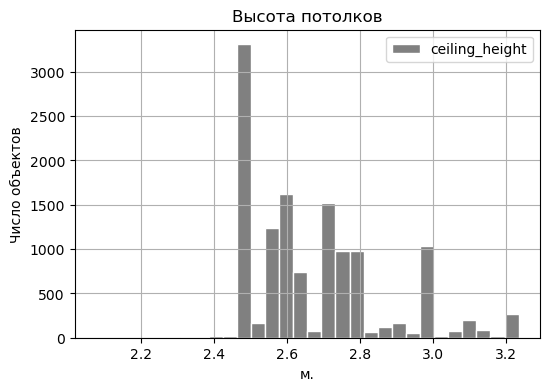


Характеристика выборки: count    13513.000000
mean         2.725804
std          0.282577
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.000000
Name: ceiling_height, dtype: float64

Характеристика объектов С-Петербурга по высоте потолков:
                 av_ceiling_height  Median_height
locality_name                                    
Санкт-Петербург           2.762165            2.7


In [122]:
ceiling=data.loc[data['ceiling_height']!=0]

q1 = ceiling['ceiling_height'].quantile(.25)
q3 = ceiling['ceiling_height'].quantile(.75)
iqr = q3 - q1 

ceiling['ceiling_height'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='grey', ec='white', legend=True)
plt.title('Высота потолков')
plt.xlabel('м.')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки:', ceiling['ceiling_height'].describe().T)
ceiling['ceiling_height'].describe().T
print()
print('Характеристика объектов С-Петербурга по высоте потолков:')
spb_ceiling=(spb_data.loc[data['ceiling_height']!=0]).pivot_table(index='locality_name', values='ceiling_height', aggfunc=['mean', 'median'])
spb_ceiling.columns=['av_ceiling_height', 'Median_height']
print(spb_ceiling)

##### Вывод:
После исключения пустых значений и выбросов, наибольшее число объектов имеют высоту потолков 2.48 м. Очень низко, ребята!)
Медианное значение -2.65 м, среднее - 2.72 м. Также популярны высоты: 2.6 м и 2.7 м. 
Кроме этого, гистограмме выделяется значение 3 м, предполагаю, как часто встречающееся для современных построек.   
Средняя и медианная высота потолков для Санкт-Петербурга - 2.7 м.

##### 8. Тип этажа квартиры («первый», «последний», «другой»);

In [123]:
#Проверка на наличие 0 значений:
print(data.loc[data['floor_type']==0] ['floor_type'].count())

0



Характеристика выборки:


count      21321
unique         3
top       Другой
freq       15686
Name: floor_type, dtype: object

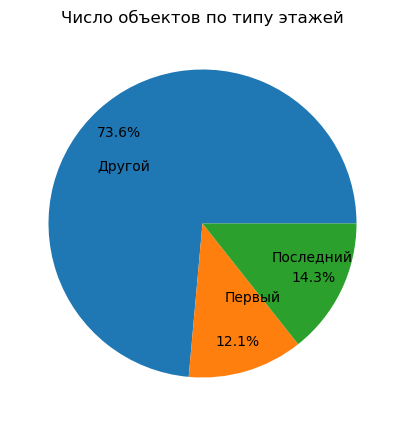

In [124]:
fl_type=data.query('floor_type!=0').pivot_table(index='floor_type', values='locality_name', aggfunc=['count'])
fl_type.columns=['number_of_items']
#Построю диаграмму на основе сводной таб. выше:
fl_type.plot(title='Число объектов по типу этажей',y='number_of_items', kind='pie', label='',pctdistance=0.8, autopct='%1.1f%%',figsize=(5,5),labeldistance=.5, legend=False)

print()
print('Характеристика выборки:')
data['floor_type'].describe().T

###### Вывод:
Предсказуемо, в выборке объектов преобладают этажи, кроме первых и последних. Доля объектов с типом Другой - 73.6%.

##### 9. Общее количество этажей в доме

In [125]:
#Проверка на наличие 0 значений:
print(data.loc[data['floors_total']==0] ['floors_total'].count())

0


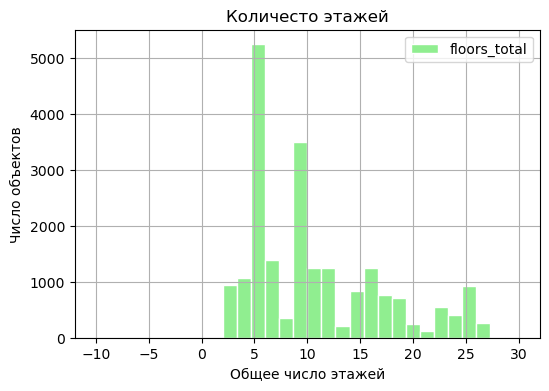

count    21283.000000
mean        10.554997
std          6.462234
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         29.000000
Name: floors_total, dtype: float64

Характеристика объектов С-Петербурга по общему числу этажей в доме:
              No_items
floors_total          
1.0                  1
2.0                 45
3.0                195
4.0                586
5.0               2782


In [126]:
t_floors=data.loc[data['floors_total']!=0]

q1 = t_floors['floors_total'].quantile(.25)
q3 = t_floors['floors_total'].quantile(.75)
iqr = q3 - q1 

t_floors['floors_total'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='lightgreen', ec='white', legend=True)
plt.title('Количесто этажей')
plt.xlabel('Общее число этажей')
plt.ylabel('Число объектов')
plt.show()
print(t_floors['floors_total'].describe().T)
print()
print('Характеристика объектов С-Петербурга по общему числу этажей в доме:')

spb_f_total=(spb_data.loc[data['floors_total']!=0]).pivot_table(index='floors_total', values='locality_name', aggfunc=['count'])
spb_f_total.columns=['No_items']
print(spb_f_total.head())


###### Вывод:
Большинство объектов в продаже в пятиэтажках, вкл. Санкт-Петерург - максимальные по числу в городе - 3023 объявлений.  
Средним значением числа этажей в доме является 9 эт., что также является медианным для Санкт-Петербурга.

##### 10. Расстояние до центра города в метрах

In [127]:
#Проверка на наличие 0 значений:
print(data.loc[data['cityCenters_nearest']==0] ['cityCenters_nearest'].count())

0


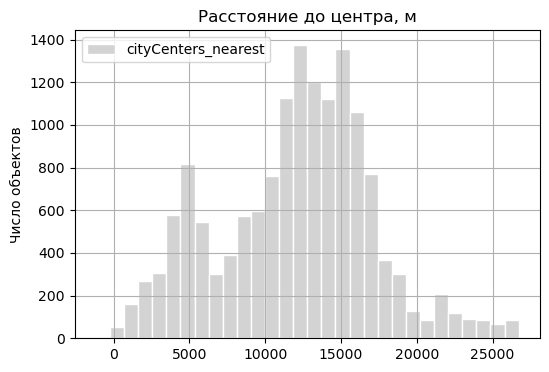


Характеристика выборки: Расстояние до центра города в метрах


count    16531.000000
mean     14213.251346
std       8643.688737
min        181.000000
25%       9289.000000
50%      13090.000000
75%      16261.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [128]:
city_centers=data.loc[data['cityCenters_nearest']!=0]
q1 = city_centers['cityCenters_nearest'].quantile(.25)
q3 = city_centers['cityCenters_nearest'].quantile(.75)
iqr = q3 - q1 

city_centers['cityCenters_nearest'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='lightgrey', ec='white', legend=True)
plt.title('Расстояние до центра, м')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: Расстояние до центра города в метрах')

city_centers['cityCenters_nearest'].describe().T

###### Вывод:
Большинство объектов расположены в 11-15 от центра города. Медианным значением расстояния является 13 км, средним - 14 км.

##### 11. Расстояние до ближайшего парка

In [129]:
#Проверка на наличие 0 значений:
print(data.loc[data['parks_nearest']==0] ['parks_nearest'].count())

0


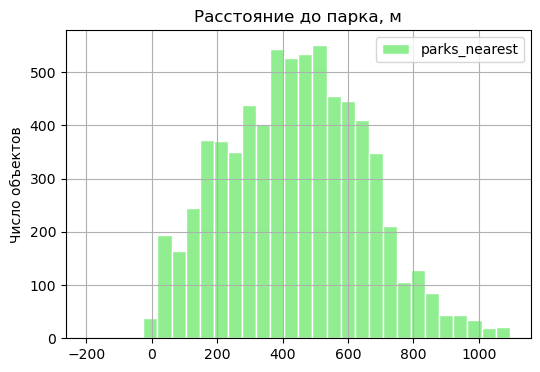


Характеристика выборки: Расстояние до парка в метрах
count    7361.000000
mean      488.186795
std       339.146921
min         1.000000
25%       287.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64


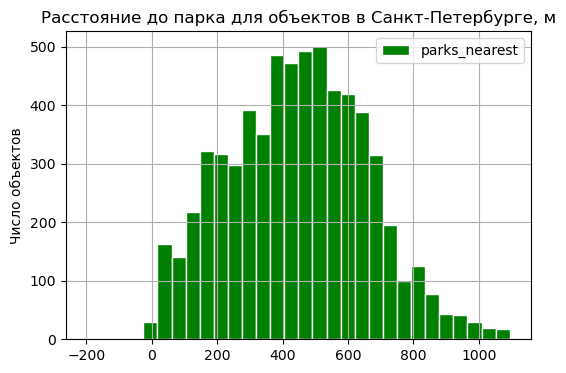


Характеристика выборки: Расстояние до парка в метрах
count    6634.000000
mean      495.996081
std       341.663530
min         1.000000
25%       295.000000
50%       460.000000
75%       616.750000
max      3190.000000
Name: parks_nearest, dtype: float64


In [130]:
park_near=data.loc[data['parks_nearest']!=0]
q1 = park_near['parks_nearest'].quantile(.25)
q3 = park_near['parks_nearest'].quantile(.75)
iqr = q3 - q1 

park_near['parks_nearest'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='lightgreen', ec='white', legend=True)
plt.title('Расстояние до парка, м')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: Расстояние до парка в метрах')
print(park_near['parks_nearest'].describe().T)

park_near_sbp=data.loc[data['locality_name']=='Санкт-Петербург']
park_near_sbp=park_near_sbp.loc[park_near_sbp['parks_nearest']!=0]
park_near_sbp['parks_nearest'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='green', ec='white', legend=True)
plt.title('Расстояние до парка для объектов в Санкт-Петербурге, м')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: Расстояние до парка в метрах')
print(park_near_sbp['parks_nearest'].describe().T)

#### Вывод:
Большинствво объектов, где указан параметр (только в 34% всей выборки), расположены в 360-540 метрах от парка.
Подавляющее большинство таких объявлений, 7.27 тыс. из 8.05 тыс., - объекты в Санкт-Петербурге.
Средним значением удалености парка является 490 м., медианным - 454 м.

In [131]:
#stat_grouped.plot(y='count', kind='pie', figsize=(8,8))
#data.sort_values(by='count',ascending=True).plot(y='count', kind= 'bar', grid=True, bins=50, figsize=(10,5))
#final_stat.sort_values(by='median_time',ascending =True).plot(y='median_time', kind= 'bar', grid=True, figsize=(10,5))
#.head(50)

###  Задание 1.
Как быстро продавались квартиры?
- гистограмма;
- среднее и медиана;
- сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими?

In [132]:
#Проверка на наличие 0 значений:
print(data.loc[data['days_exposition']==0] ['days_exposition'].count())

0


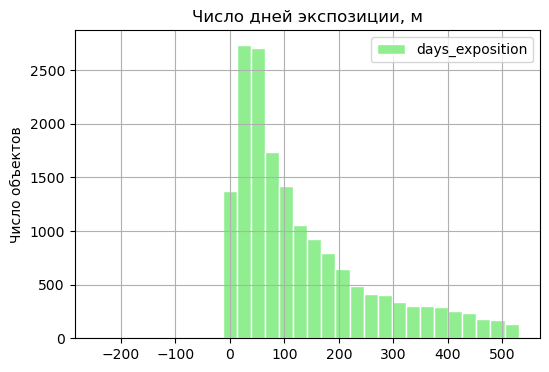


Характеристика выборки: число дней экспозиции:
count    18358.000000
mean       185.556706
std        222.569245
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Число ОН экспонированные менее 10 дней: 1148


In [133]:
#анализ всей выборки:
days_exp=data.loc[data['days_exposition']!=0]
q1 = days_exp['days_exposition'].quantile(.25)
q3 = days_exp['days_exposition'].quantile(.75)
iqr = q3 - q1 

days_exp['days_exposition'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(6,4), color='lightgreen', ec='white', legend=True)
plt.title('Число дней экспозиции, м')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: число дней экспозиции:')
print(days_exp['days_exposition'].describe().T);
print()
print('Число ОН экспонированные менее 10 дней:', data.loc[data['days_exposition']<=10] ['days_exposition'].count())

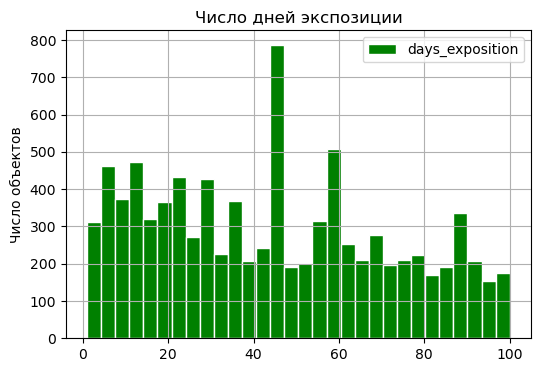


Характеристика выборки: число дней экспозиции:
count    9085.000000
mean       44.323390
std        27.377894
min         1.000000
25%        20.000000
50%        44.000000
75%        65.000000
max        99.000000
Name: days_exposition, dtype: float64


In [134]:
#анализ среза до 100 дней:
days_exp=data.loc[data['days_exposition']<100]
 
days_exp['days_exposition'].hist(bins=30, range=(1,100), figsize=(6,4), color='green', ec='white', legend=True)
plt.title('Число дней экспозиции')
plt.ylabel('Число объектов')
plt.show()
print()
print('Характеристика выборки: число дней экспозиции:')
print(days_exp['days_exposition'].describe().T);

#### Вывод:
После отсечения строк, где число дней экспозиции отсутствует (также вызывают вопросы), на гистограмме видно, что:
- наибольшее число объектов было продано (или снято с продажи) через 45-50 дней экспозиции. 
- Медианным значением срока экспозиции является 95 дней, средним - 180 дней.
- Быстрыми продажами можно считать срок до 45 дней, что соответствует первому квартилю гистограммы:
- нормальными - срок от 45 до 231 дней.
- на срезе данных до 100 дней, видны пики в точках 1.5 и 2 месяца. Является ли это стандартным сроком для продажи успешных лотов? Это предположение, которое возможно подтверждается на практике.)

Также, вопрос вызывает большое (4414 записей) число ОН со сроком экспозиции менее 10 дней. Проверить, не выглядят ли как недостоверные.

count    18358.000000
mean       185.556706
std        222.569245
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64


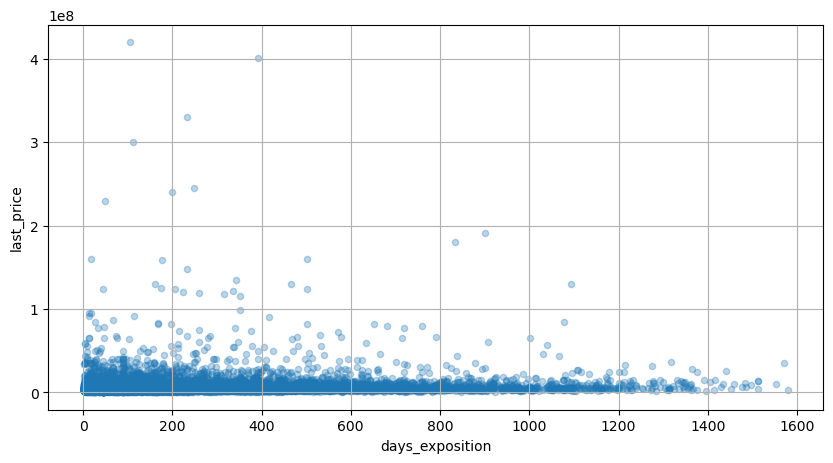

In [135]:
#Проверю распределение объектов по сроку экспозиции от цены.
data.sort_values(by='price_per_m',ascending =True).plot(x='days_exposition', y='last_price', figsize=(10,5),grid=True, kind='scatter', alpha=0.3)
print(data['days_exposition'].describe().T)
#Видно, что зависимости срока продажи от цены нет. Но большое число обхектов провавались ненормально долго, что не вызвано ценой.



Распределение числа объявлений с экстремально коротким сроком экспозиции <5 дней по годам:
               count
     days_exposition
year                
2016               2
2017             151
2018             207
2019              87

Матрица рассеивания по трем параметрам: days_exposition - year - price_per_m :


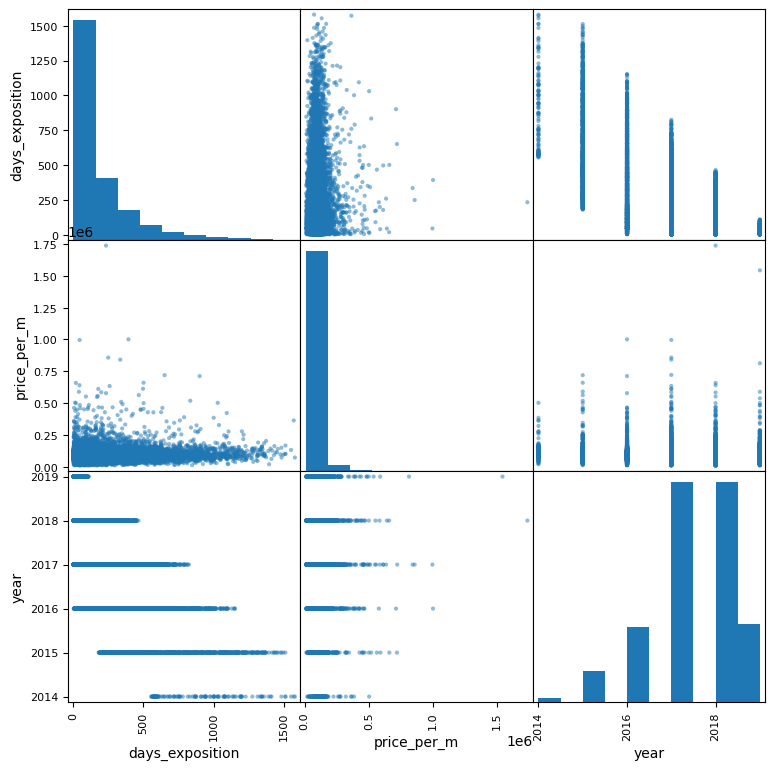

In [136]:
#Ограничу датафрейм несколькими колонками, 
#необходимыми для анализа зависимости количества дней экспозиции от года и цены 1 кв. м.:
data_cancelled_sales=data[['days_exposition', 'price_per_m', 'year']]

pd.plotting.scatter_matrix(data_cancelled_sales, figsize=(9,9));
print()
print('Распределение числа объявлений с экстремально коротким сроком экспозиции <5 дней по годам:')
cancelled_tab=data.loc[data['days_exposition']<=5]
print(cancelled_tab.pivot_table(index=['year'], values='days_exposition', aggfunc=['count']))

print()
print('Матрица рассеивания по трем параметрам: days_exposition - year - price_per_m :')


<Axes: >

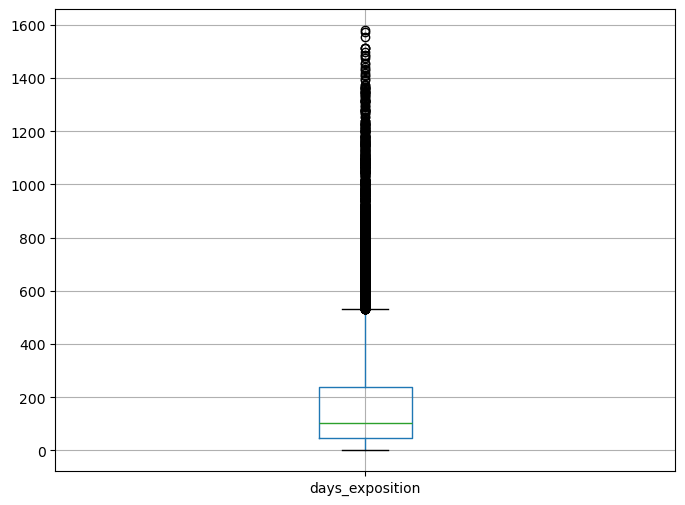

In [137]:
#Построю диаграмму размаха для параметра - кол-во дней экспозиции:
data.boxplot(column='days_exposition', figsize=(8, 6))

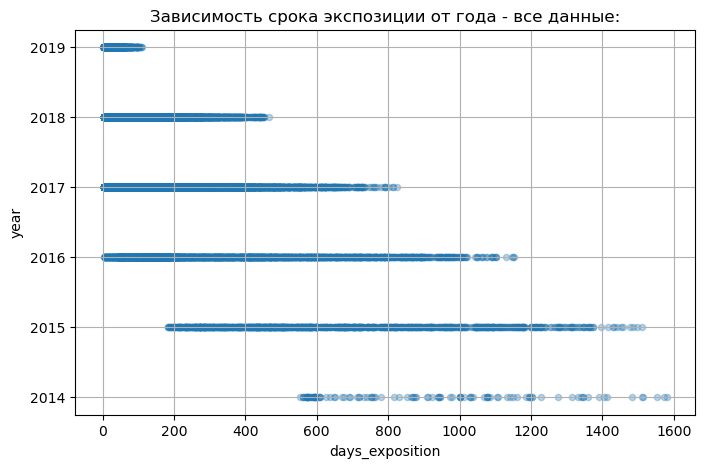

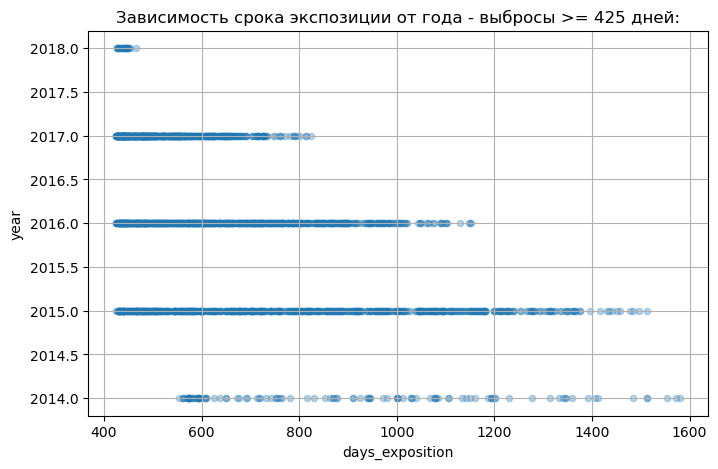

In [138]:
# Проанализирую зависимость срока экспозиции от года
data.sort_values(by='last_price',ascending =True).plot(x='days_exposition',title='Зависимость срока экспозиции от года - все данные:', y='year', figsize=(8,5),grid=True, kind='scatter', alpha=0.3);
print()
#Проанализирую данные за пределами верхнего уса - выбросы:
data_suspisious=data.loc[data['days_exposition']>=425]
data_suspisious.sort_values(by='last_price',ascending =True).plot(x='days_exposition', title='Зависимость срока экспозиции от года - выбросы >= 425 дней:', y='year', figsize=(8,5),grid=True, kind='scatter', alpha=0.3);

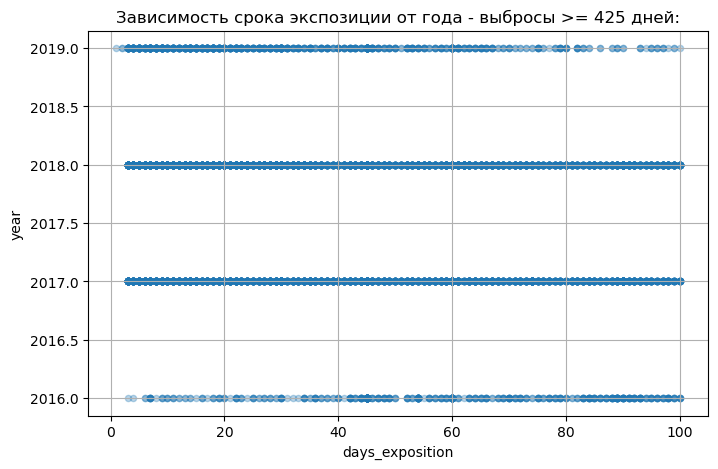

In [139]:
# Проанализирую зависимость срока экспозиции от года

data_suspisious2=data.loc[data['days_exposition']<=100]
data_suspisious2.sort_values(by='last_price',ascending =True).plot(x='days_exposition', title='Зависимость срока экспозиции от года - выбросы >= 425 дней:', 
                                                                  y='year', figsize=(8,5),grid=True, kind='scatter', alpha=0.3);

#### Вывод:
При анализе данных на предмет срока продажи в зависимости от года публикации видно, что экстремальные значения срока экспозиции относятся к объектам, размещенным к продаже в 2014 и 2015 годах - от 200 до 1600 дней (!) 
Ой, а что случилось?)

Срез с параметром ограниченным 100 днями явно указывает, на кризисные явления с отрасли, что привело практически к отсутствию продаж в разумный срок до 100 дней в 2014 и 2015 годах. Т.о. продажи наблюдаются о точках 420 и 540 дней с даты публикации этих годах, соответственно.


### Задание 2.
Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).

###### Вывод:

Из матрицы корреляции выявлено:

Cовсем незначительная корреляция между ценой ОН и следующими параметрами:
- число дней экспозиции - 0,053;
- высота потолков - 0,081;

Чуть более значимая положительная зависимость для факторов:
- наличие парка в радиусе 3 км - 0,198;
- наличие пруда в радиусе 3 км - 0,21;

Более очевидная и естественная корреляция общей цены объекта с физическими параметрами:
- число комнат - 0,364;
- площадь кухни -  0,515;
- жилая площадь - 0,586;
- общая площадь - 0,654;
- стоимость квадратного метра - 0,738.

In [140]:
#Ограничу датафрейм несколькими колонками, необходимыми для анализа зависимости цены:
data_analisys=data[['last_price', 'total_area', 
       'rooms', 'ceiling_height',  'living_area', 
       'is_apartment', 'kitchen_area', 'balcony',
        'airports_nearest', 'days_exposition', 'price_per_m', 'ponds_around3000','parks_around3000',
        'cityCenters_km']]

#построю матрицу корреляции и тепловую карту на ее основе:
corr=data_analisys.corr()
corr

,last_price,total_area,rooms,ceiling_height,living_area,is_apartment,kitchen_area,balcony,airports_nearest,days_exposition,price_per_m,ponds_around3000,parks_around3000,cityCenters_km
last_price,1.000000,0.697736,0.391372,0.093137,0.603455,-0.000682,0.521110,0.043541,-0.028620,0.086547,0.737877,0.173114,0.159936,-0.059394
total_area,0.697736,1.000000,0.765658,0.114070,0.939628,-0.010265,0.609193,0.061140,-0.034990,0.141770,0.305326,0.168663,0.160152,-0.085137
rooms,0.391372,0.765658,1.000000,0.109224,0.850674,-0.003794,0.270715,0.028544,-0.066751,0.122418,0.056073,0.098483,0.132251,-0.068909
ceiling_height,0.093137,0.114070,0.109224,1.000000,0.131424,-0.030900,0.057300,0.211189,-0.008212,0.058963,0.109036,0.048266,0.086296,0.012813
living_area,0.603455,0.939628,0.850674,0.131424,1.000000,-0.008378,0.429540,0.021649,-0.057971,0.137932,0.217174,0.151817,0.181098,-0.089201
is_apartment,-0.000682,-0.010265,-0.003794,-0.030900,-0.008378,1.000000,-0.010333,-0.016528,0.008066,-0.060453,0.005904,-0.014381,-0.000348,-0.007279
kitchen_area,0.521110,0.609193,0.270715,0.057300,0.429540,-0.010333,1.000000,0.098862,0.008033,0.101308,0.400679,0.149395,0.088741,-0.070364
balcony,0.043541,0.061140,0.028544,0.211189,0.021649,-0.016528,0.098862,1.000000,0.069001,-0.027542,0.073114,-0.032877,-0.081057,0.016111
airports_nearest,-0.028620,-0.034990,-0.066751,-0.008212,-0.057971,0.008066,0.008033,0.069001,1.000000,-0.016562,-0.036412,-0.049021,0.001445,0.271633
days_exposition,0.086547,0.141770,0.122418,0.058963,0.137932,-0.060453,0.101308,-0.027542,-0.016562,1.000000,0.044847,0.075855,0.061541,-0.040949


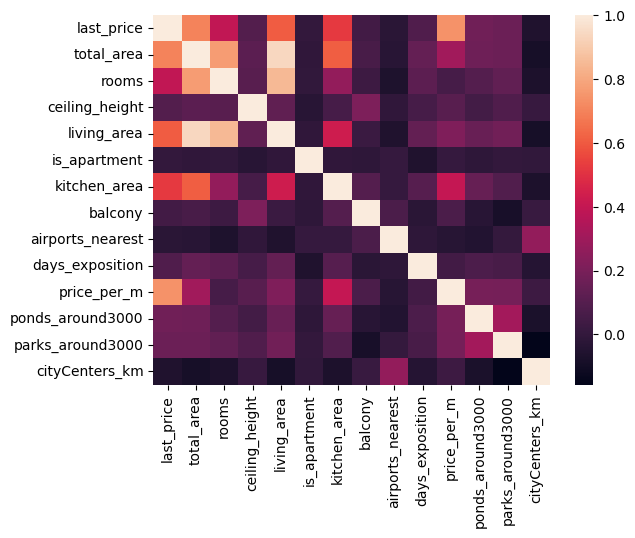

In [156]:
#Построю тепловую карту на основе матрицы корреляции:
seaborn.heatmap(corr);

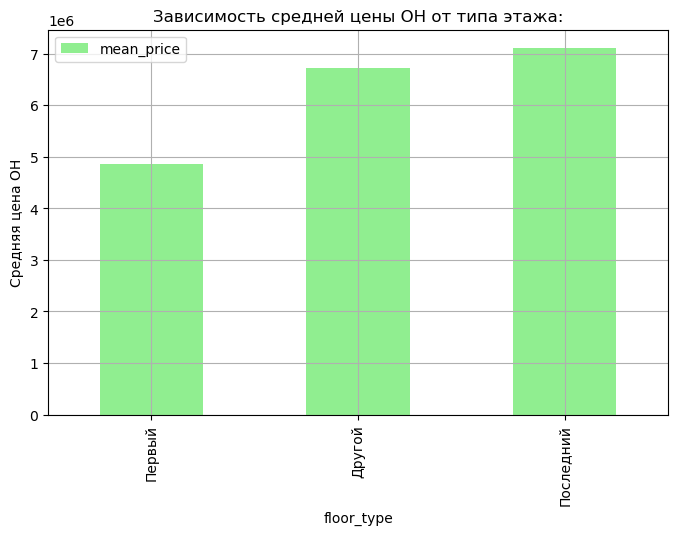

In [142]:
# Проанализирую Зависимость цены ОН от типа этажа:
floor_type_av=data.pivot_table(index='floor_type',values='last_price',aggfunc='mean')
floor_type_av.columns=['mean_price']

floor_type_av.sort_values(by='mean_price',ascending =True).plot(y='mean_price', legend=True,title='Зависимость средней цены ОН от типа этажа:',figsize=(8,5),grid=True, color= 'lightgreen', kind='bar');
floor_type_av.sort_values(by='mean_price',ascending =True)
plt.ylabel('Средняя цена ОН')
plt.show()

###### Вывод:
На графике выше видно, что есть зависимость цены ОН от типа этажа. 1е этажи наименее популярны, там средняя цена объектов до 5 млн,  цена лотов на последних этажах максимальные - свыше 7 млн. Все прочие этажи находятся на уровне примерно 6.7 млн по средней цене лота. 

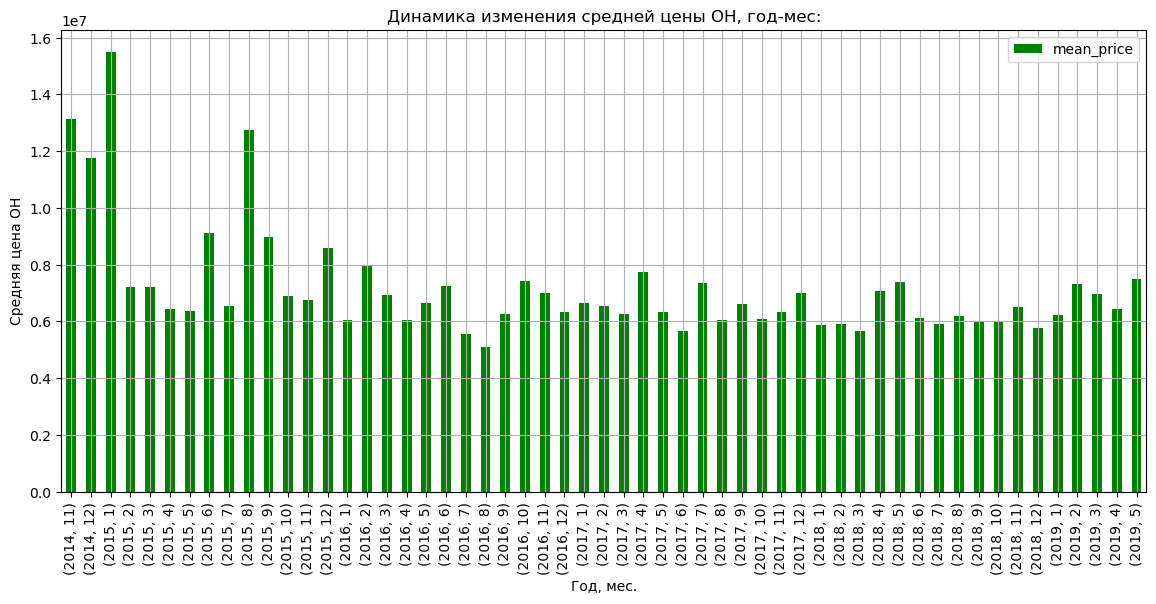

In [155]:
# Проанализирую динамику цен помесячно:
year_av=data.pivot_table(index=['year','month'],values='last_price',aggfunc='mean')
year_av.columns=['mean_price']

year_av.sort_values(by=['year','month'],ascending =True).plot(y='mean_price', legend=True,title='Динамика изменения средней цены ОН, год-мес:', color='green',figsize=(14,6),grid=True, kind='bar');
plt.ylabel('Средняя цена ОН')
plt.xlabel('Год, мес.')
plt.figsize=(10,8)
plt.show()



######  Вывод
На графике колебания средней цены ОН видны значительные пики в двух последних месяцах 2014 года и в период с июня по сентябрь 2015 года, что соответствует волнам резкой девальвации рубля до 50 и 65 руб./долл. в соответствующие периоды с уровня около 35 руб./долл. месяцами ранее до августа 2014, где наблюдалась относительная стабильность.

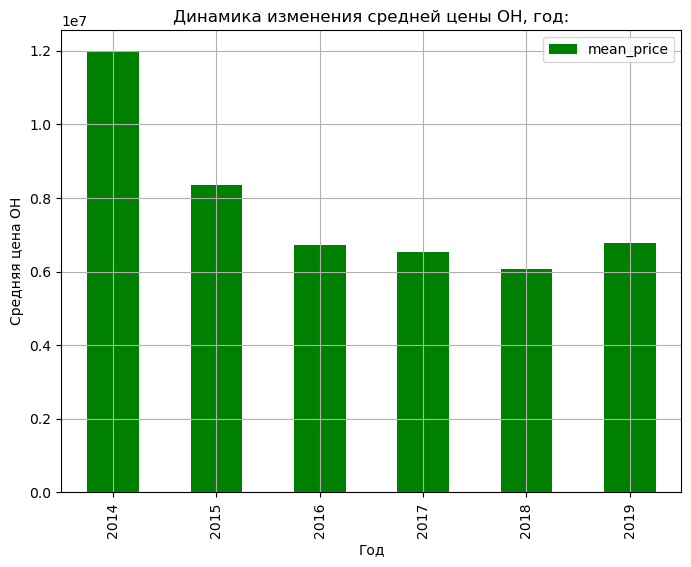

In [144]:
# Проанализирую динамику цен по годам:
year_av=data.pivot_table(index=['year'],values='last_price',aggfunc='mean')
year_av.columns=['mean_price']

year_av.sort_values(by=['year'],ascending =True).plot(y='mean_price', 
                                                      legend=True,title='Динамика изменения средней цены ОН, год:', 
                                                      color='green',figsize=(8,6),grid=True, kind='bar');
plt.ylabel('Средняя цена ОН')
plt.xlabel('Год')
plt.show()


6.0.0.4  Вывод
С первого года наблюдейний - 2014, где средняя цена ОН была максимальной и в среднем равнялась 12 млн, цена снижалась. Резкое падение до уровня около 9 млн и далее, вплоть до 2018 года до уровня 6 млн. Рост возобновилсся в 2019 году - средняя 7 млн. руб.

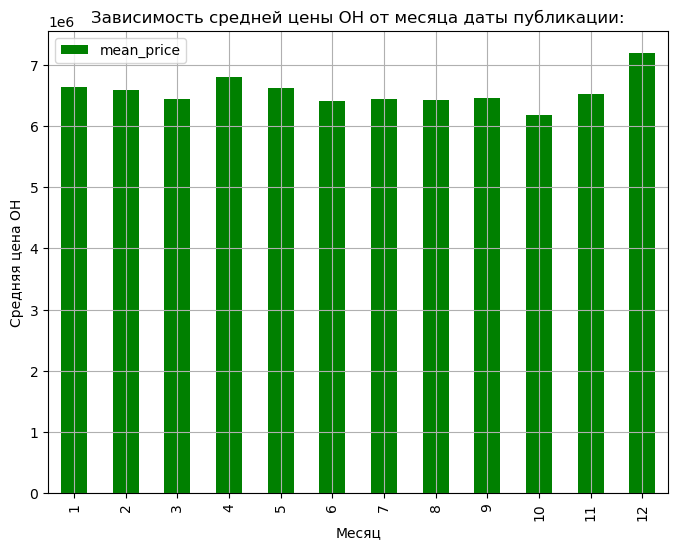

,mean_price
count,1.200000e+01
mean,6.560163e+06
std,2.534018e+05
min,6.173171e+06
25%,6.431752e+06
50%,6.489238e+06
75%,6.630672e+06
max,7.194912e+06


In [145]:
# Проанализирую динамику цен помесячно:
month_av=data.pivot_table(index=['month'],values='last_price',aggfunc='mean')
month_av.columns=['mean_price']

month_av.sort_values(by=['month'],ascending =True).plot(y='mean_price',  
                                                        legend=True,title='Зависимость средней цены ОН от месяца даты публикации:', 
                                                        color='green',figsize=(8,6),grid=True, kind='bar');
plt.ylabel('Средняя цена ОН')
plt.xlabel('Месяц')
plt.show()
month_av.describe()


6.0.0.5  Вывод
Зависимость средней цены ОН от месяца даты публикации минимальна. Максимальных отметок средняя цена достигала в декабре - 7.01 млн. Месяцы: январь, апрель и сентрябрь чуть выше средней по году.

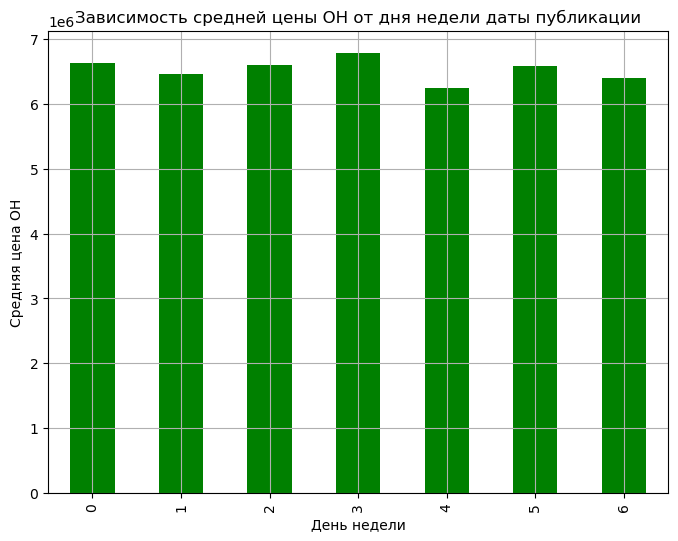

In [146]:
# Проанализирую динамику цен по дню:
year_av=data.pivot_table(index=['week_day'],values='last_price',aggfunc='mean')
year_av.columns=['mean_price']

year_av.sort_values(by=['week_day'],ascending =True).plot(y='mean_price', legend=False,title='Зависимость средней цены ОН от дня недели даты публикации', color='green',figsize=(8,6),grid=True, kind='bar');
plt.ylabel('Средняя цена ОН')
plt.xlabel('День недели')
plt.show()


6.0.0.6  Вывод
Зависимость средней цены ОН от дня недели даты публикации минимальна. Изучать такую зависимость в принципе не целесообразно, т.к. данные сгруппированы по дню недели разных временных отрезков, где на цену могли влиять другие факторы. Тем не менее, цены, опубликованные в субботу максимальны - 7 млн. руб.

### Задание 3.
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

ТОП-10 городов: ['Санкт-Петербург' 'пос. Шушары' 'пос. Парголово' 'пос. Мурино' 'Пушкин'
 'д.Кудрово' 'Колпино' 'Гатчина' 'Выборг' 'Всеволожск']

Цена за метр для ТОП-10 городов:
                 mean_price_per_m
locality_name                    
Всеволожск           69029.150056
Выборг               58365.453383
Гатчина              68692.933639
Колпино              75226.296398
Пушкин              103247.024408
Санкт-Петербург     114166.363985
д.Кудрово            92147.617186
пос. Мурино          85656.699520
пос. Парголово       90691.341972
пос. Шушары          78553.401055


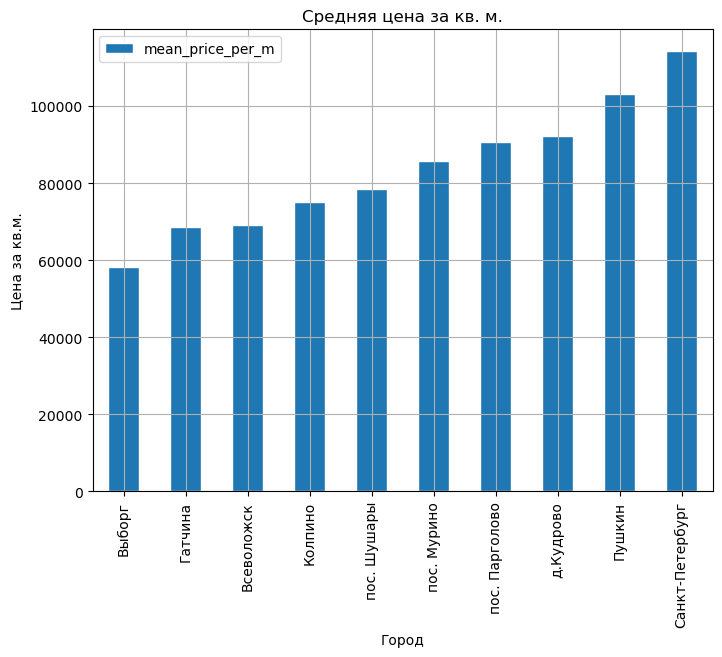

In [147]:
# Топ 10 городов по числу объявлений:
top_price=data.loc[data['group_cities']!='Другие']
print('ТОП-10 городов:', top_price['locality_name'].unique())
print()
print('Цена за метр для ТОП-10 городов:')
av_price=top_price.pivot_table(index='locality_name', values='price_per_m', aggfunc=['mean'])
av_price.columns=['mean_price_per_m']
print(av_price.head(10))

av_price.sort_values(by='mean_price_per_m').plot(kind='bar', grid=True, ec='white', figsize=(8, 6))

plt.title('Средняя цена за кв. м.')
plt.xlabel('Город')
plt.ylabel('Цена за кв.м.')
plt.show()

###### Вывод:
На графике выше видно, максимальная средняя цена кв.м. в Санкт-Петербурге -114836 т. руб.

### Задание 4.
Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.

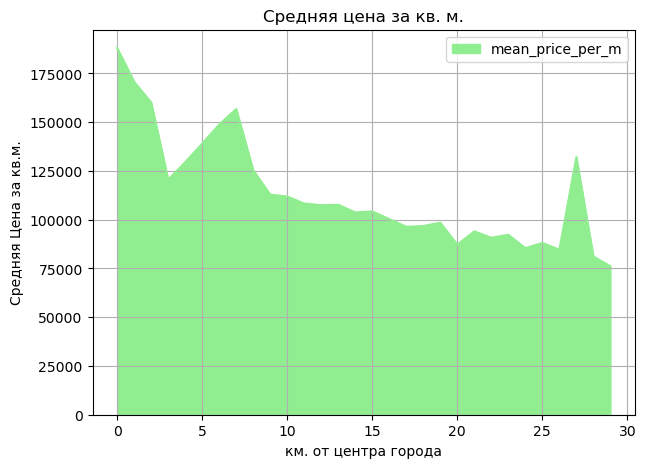

In [148]:
# Топ 10 городов по числу объявлений:
spb_data=data.loc[data['group_cities']=='Санкт-Петербург']

av_price_spb=spb_data.pivot_table(index='cityCenters_km', values='price_per_m', aggfunc='mean')
av_price_spb.columns=['mean_price_per_m']
#print(av_price_spb)

av_price_spb.sort_values(by='cityCenters_km').plot(grid=True, color='lightgreen', figsize=(7,5), kind='area')

plt.title('Средняя цена за кв. м.')
plt.xlabel('км. от центра города')
plt.ylabel('Средняя Цена за кв.м.')
plt.show()



###### Вывод: Средняя цена кв.м. в Санкт-Петербурге по мере удаления от центра сокращается от максимальной в 183 690 руб. за м. кв., которой соответствует значение 0 км. до 72 953 на удалении 29 км.
Резкое падение на 10% и 20 % от 0 максимальной отметки происходит для объектов на удалении 2 и 3 км., соответственно. Но в интервале 4-7 км. цена опять стремится к максимальной и достигает 156 тыс. за кв. м.
Далее опять снижается с шагом, примерно в 0.5% от максимальной. Финальный пик на уровне 132 тыс. за кв.м. к точке 27 км. от центра, возможно, объясняется расположением объектов в престижной пригородной локации.

######  Основные выводы:

Исследование объявлений о продаже квартир.
Базой для исследования служат данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
Цель исследования: научиться определять рыночную стоимость объектов недвижимости. 
Для этого проводится исследовательский анализ данных с целью установить параметры, влияющие на цену объектов. 

###### Заключение по этапу предобработки данных и выявления аномалий:
Выявлены аномалии и дефекты в данных:
•	Присутствуют 197 объектов, где не указано количество комнат. Возможно, это студии.\
•	В поле Высота потолков присутствуют недостоверные данныые 1, 1.26 и 100 метров. Удалить такие данные.\
•	В поле всего этажей в доме есть недостоверное значение 60 эт. удалить (справочно: в июле 2016 года 35-этажный Лахта Центр стал самым высоким зданием Санкт-Петербурга, его высота достигла 147 м)\
•	Минимальное значение - расстояние до аэропорта ( airports_nearest) не должно равняться нулю. Исправить, если возможно.\
•	Размер кухни 1.3 выглядит ошибочным. Удалить строку.\
•	Жилая площадь - мин. значение 2 м. Удалить строку, как недостоверную.\
•	Минимальное значение - days_exposition = 1 день, менее 5 дней - 338 строки. Это подозрительно, возможно недостоверные объявления. Удалить такие строки. Максимальное значение -1580, также повлияет на среднюю.\

Также:\
•	В поле Высота потолков присутствуют недостоверные данные 1, 1.26 и 100 метров. Удалены выбросы\
•	В поле всего этажей в доме есть недостоверное значение 60 эт. удаляю. (В июле 2016 года 35-этажный Лахта Центр стал самым высоким зданием Санкт-Петербурга, его высота достигла 147 м)\
•	Минимальное значение - расстояние до аэропорта ( airports_nearest) не должно равняться нулю. Исправить, если возможно.\
•	Размер кухни 1.3 выглядит ошибочным. удалены записи со значением менее 2м.\
•   Жилая площадь - мин. значение 2 м. Удаляю строку, как недостоверную.\
•	Минимальное значение - days_exposition = 1 день. Это подозрительно, возможно недостоверные объявления. Удалить такие строки. Максимальное -1580, также повлияет на среднюю.\
•	минимальное значение 12190 last_price неправдоподобно. Удалю эту строку. просмотреть прочие объекты с мин. ценами.\
•	минимальное значение total_area =12 м неправдоподобно. Возможно комната.\
•	минимальное значение rooms=0 неправдоподобно. возможно речь о студии. Проверить.\
•	минимальное значение price_per_m =111.83 неправдоподобно.\

Данные дополнены следующими техническими параметрами:\

 • 	week_day - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)\
• 	month - месяц публикации объявления\
• 	year- год публикации объявления\
• 	cityCenters_km - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)\
• 	floor_type -тип этажа квартиры (значения — «первый», «последний», «другой»).\
•	group_cities\ - группировка ТОП-10 и прочих городов.\
•	price_per_m - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)\

#### Проведен исследовательский анализ ключевых параметров:

1. Число объектов в городах

Вывод:
•	ППодавляющее большинство объектов, выставленных на продажу за наблюдаемый отрезок времени, с нояб. 2014 г. по май 2019 г.,расположено в Санкт-Петербурге - 14292 объектов (67% от общего числа). • Всего в выборке представлены 309 населенных пункта региона, где по числу выставленных на продажу объектов, кроме лидера - Санкт-Петербурга, доминируют пос. Мурино и пос. Шушары, 479 и 398 объектов соответственно.

2. Общая площадь
Вывод:
•	Подавляющее большинство объектов имеют площадь от 40 до 69 м2. Самый распространенный метраж - 42-43 м2.
•	- Выбросами на диаграмме размаха выглядят значения до 20 и более ~120 м2. 
•	- Медианным значением площади является 55 м2 для г. Санкт-Петербург, 50 м2 для всех городов выборки.
•	Объекты с площадью до 20 метров, предположительно, являются нежилыми - гаражи, кладовки. Их целесообразно удалить при анализе цен.


3. Жилая площадь
Вывод:
Наиболее частое значение жилой площади на уровне 18-19 м2. Значения менее 20 м2 наблюдаются, но, вероятно, являются достоверными для объектов самых маленьких метражей. Хвост диаграммы по мере роста показателя доходит до значений около 150 для жилой площади. Такие значения, возможно, представляют объекты типа индивидуальных домов. Медианное значение жилой площади для Санкт-Петербурга - 31 м2.


4. Площадь кухни
Вывод:
Наиболее распространенный метраж находится в интервале от 5 до 10 м2. Наибольшее число объектов выборки имеют кухню - 5,7 м2. Значения менее 5 м2 присутствуют, но, возможно, являются достоверными для студий или апартаментов. Медианное значение жилой площади для Санкт-Петербурга около 10 м2. Максимальное значение площади кухни - 112 м. Выше проверено, что подобные метражи кухни указаны для крупных по площади объектов, предположительно частных домов и, возможно, эксклюзивных квартир.

 
5. Цена объекта

Вывод:
Исключаю выбросы, т. о. максимальная цена объектов - 12 млн. руб. Большинство объектов недвижимости имеют цену в пределах от 3 до 5 млн. руб. Наибольшее число объектов имеют цену около 3.5-4 млн.руб. Среднее значение - 6,5 млн, медиана 4.6 млн.

6. Количество комнат

Наиболее число объектов - 1 и 2-х комнатные квартиры, вкл. Санкт-Петербург.

7. Высота потолков
Вывод:
После исключения пустых значений и выбросов, наибольшее число объектов имеют высоту потолков 2.48 м. Очень низко, ребята!) Медианное значение -2.65 м, среднее - 2.72 м. Также популярны высоты: 2.6 м и 2.7 м. Кроме этого, гистограмме выделяется значение 3 м, предполагаю, как часто встречающееся для современных построек.
Средняя и медианная высота потолков для Санкт-Петербурга - 2.7 м.


8. Тип этажа квартиры («первый», «последний», «другой»
Вывод:
Предсказуемо, в выборке объектов преобладают этажи, кроме первых и последних. Доля объектов с типом Другой - 73.6%.


9. Общее количество этажей в доме
Вывод:
Большинство объектов в продаже в пятиэтажках, вкл. Санкт-Петербург - максимальные по числу в городе - 3023 объявлений.
Средним значением числа этажей в доме является 9 эт., что также является медианным для Санкт-Петербурга.


10. Расстояние до центра города в метрах

Вывод:
Большинство объектов расположены в 11-15 от центра города. Медианным значением расстояния является 13 км, средним - 14 км.


11. расстояние до ближайшего парка

Вывод:
Большинство объектов, где указан параметр (только в 34% всей выборки), расположены в 360-540 метрах от парка. Подавляющее большинство таких объявлений, 7.27 тыс. из 8.05 тыс., - объекты в Санкт-Петербурге. Средним значением удалености парка является 490 м., медианным - 454 м.


### Задание 1. Как быстро продавались квартиры?

Выводы:

Вывод:
После отсечения строк, где число дней экспозиции отсутствует (также вызывают вопросы), на гистограмме видно, что:
•	наибольшее число объектов было продано (или снято с продажи) через 45-50 дней экспозиции.
•	Медианным значением срока экспозиции является 95 дней, средним - 180 дней.
•	Быстрыми продажами можно считать срок до 45 дней, что соответствует первому квартилю гистограммы:
•	нормальными - срок от 45 до 231 дней.
•	на срезе данных до 100 дней, видны пики в точках 1.5 и 2 месяца. Является ли это стандартным сроком для продажи успешных лотов? Это предположение, которое возможно подтверждается на практике.)
Также, вопрос вызывает большое (4414 записей) число ОН со сроком экспозиции менее 10 дней. Проверить, не выглядят ли как недостоверные.

Вывод:
При анализе данных на предмет срока продажи в зависимости от года публикации видно, что экстремальные значения срока экспозиции относятся к объектам, размещенным к продаже в 2014 и 2015 годах - от 200 до 1600 дней (!) Ой, а что случилось?)
Срез с параметром, ограниченным 100 днями явно указывает, на кризисные явления с отрасли, что привело практически к отсутствию продаж в разумный срок до 100 дней в 2014 и 2015 годах. Т. о. продажи наблюдаются о точках 420 и 540 дней с даты публикации этих годах, соответственно.


### Задание 2. Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построены графики, которые показывают зависимость цены от параметров: - общая площадь; - жилая площадь; - площадь кухни; - количество комнат; - тип этажа, на котором расположена квартира (первый, последний, другой); - дата размещения (день недели, месяц, год).
Вывод:
Из матрицы корреляции выявлено:
Cовсем незначительная корреляция между ценой ОН и следующими параметрами:
•	число дней экспозиции - 0,053;
•	высота потолков - 0,081;
Чуть более значимая положительная зависимость для факторов:
•	наличие парка в радиусе 3 км - 0,198;
•	наличие пруда в радиусе 3 км - 0,21;
Более очевидная и естественная корреляция общей цены объекта с физическими параметрами:
•	число комнат - 0,364;
•	площадь кухни - 0,515;
•	жилая площадь - 0,586;
•	общая площадь - 0,654;
•	стоимость квадратного метра - 0,738.

Вывод:
На графике выше видно, что есть зависимость цены ОН от типа этажа. 1е этажи наименее популярны, там средняя цена объектов до 5 млн, цена лотов на последних этажах максимальные - свыше 7 млн. Все прочие этажи находятся на уровне примерно 6.7 млн по средней цене лота.

Вывод
На графике колебания средней цены ОН видны значительные пики в двух последних месяцах 2014 года и в период с июня по сентябрь 2015 года, что соответствует волнам резкой девальвации рубля до 50 и 65 руб./долл. в соответствующие периоды с уровня около 35 руб./долл. месяцами ранее до августа 2014, где наблюдалась относительная стабильность.

- Зависимость цены от года:
С первого года наблюдейний - 2014, где средняя цена ОН была максимальной и в среднем равнялась 12 млн, цена снижалась. Резкое падение до уровня около 9 млн и далее, вплоть до 2018 года до уровня 6 млн. Рост возобновилсся в 2019 году - средняя 7 млн. руб.
- Зависимость средней цены ОН от месяца даты публикации минимальна. 
Максимальных отметок средняя цена достигала в декабре - 7.01 млн. Месяцы: январь, апрель и сентрябрь чуть выше средней по году.
- Зависимость средней цены ОН от дня недели даты публикации минимальна. 
Изучать такую зависимость в принципе не целесообразно, т.к. данные сгруппированы по дню недели разных временных отрезков, где на цену могли влиять другие факторы. Тем не менее, цены, опубликованные в субботу максимальны - 7 млн. руб.

### Задание 3. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Ответ: максимальная средняя цена кв.м. в Санкт-Петербурге -114836 т. руб.

### Задание 4. Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра.


Средняя цена кв.м. в Санкт-Петербурге по мере удаления от центра сокращается от максимальной в 183 690 руб. за м. кв., которой соответствует значение 0 км. до 72 953 на удалении 29 км.
Резкое падение на 10% и 20 % от 0 максимальной отметки происходит для объектов на удалении 2 и 3 км., соответственно. Но в интервале 4-7 км. цена опять стремится к максимальной и достигает 156 тыс. за кв. м. Далее опять снижается с шагом, примерно в 0.5% от максимальной. Финальный пик на уровне 132 тыс. за кв.м. к точке 27 км. от центра, возможно, объясняется расположением объектов в престижной пригородной локации.




**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.